# RIDGE REGRESSION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes
data=load_diabetes()

In [6]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [9]:
X=data.data
Y=data.target

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=45)

In [13]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [14]:
L.fit(X_train,Y_train)

LinearRegression()

In [15]:
Y_predict=L.predict(X_test)

In [23]:
from sklearn.metrics import r2_score,mean_squared_error
print("R2 Score " ,r2_score(Y_test,Y_predict))
print("RMSE ", np.sqrt(mean_squared_error(Y_test,Y_predict)) )

R2 Score  0.5188113124539249
RMSE  48.72713760953253


In [25]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.001)
R.fit(X_train,Y_train)

Ridge(alpha=0.001)

In [27]:
Y_predict1=R.predict(X_test)
print("R2 Score " ,r2_score(Y_test,Y_predict1))
print("RMSE ", np.sqrt(mean_squared_error(Y_test,Y_predict1)) )

R2 Score  0.5201448351821765
RMSE  48.65957177859253


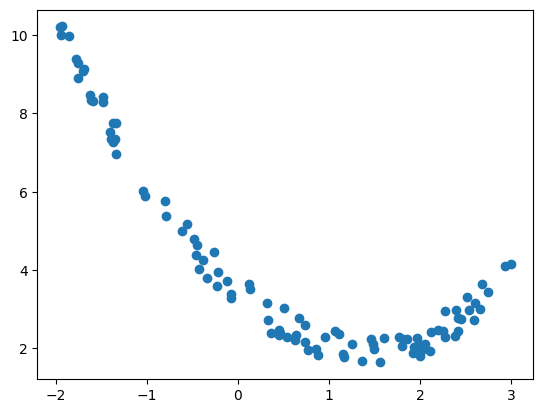

In [34]:
m=100
x1 = 5*np.random.rand(m,1)-2
x2 = 0.7*x1**2-2*x1 +3 + np.random.rand(m,1)

plt.scatter(x1,x2)
plt.show()

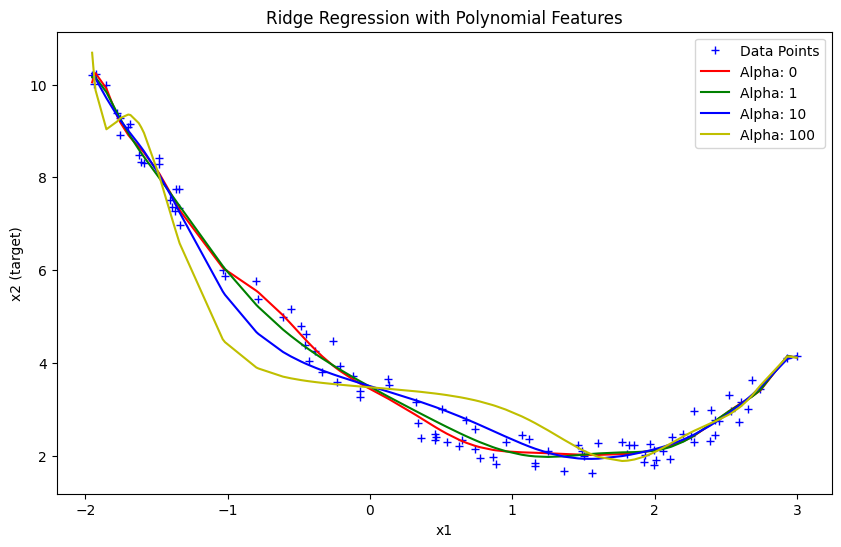

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 1, 10, 100]
cs = ['r', 'g', 'b', 'y'] 

plt.figure(figsize=(10,6))
plt.plot(x1, x2, 'b+', label="Data Points")

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label=f'Alpha: {alpha}')

plt.legend()
plt.xlabel("x1")
plt.ylabel("x2 (target)")
plt.title("Ridge Regression with Polynomial Features")
plt.show()